

### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [11]:
pd.set_option('display.max_columns', None)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   12684 non-null  object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [99]:
data["car"] = data["car"].fillna("N/A")
data["CarryAway"] = data["CarryAway"].fillna("N/A")
data = data.rename(columns={'passanger':'passenger'})

4. What proportion of the total observations chose to accept the coupon? 



In [100]:
data[data["Y"]==1]["Y"].count()/data["Y"].count()

0.5684326710816777

**56.8%** of the coupons were accepted.

5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

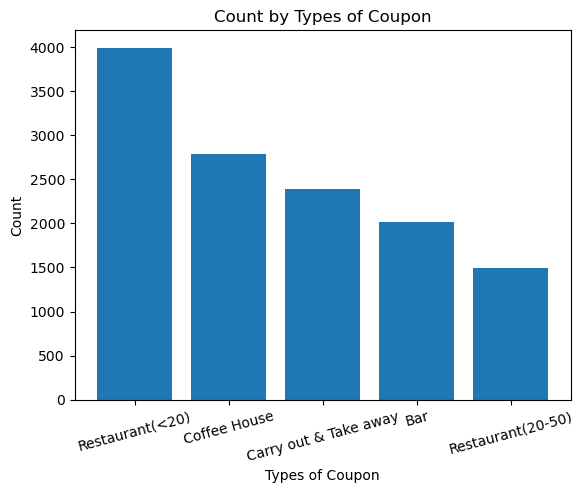

In [101]:
plt.bar(data["coupon"].unique(), data["coupon"].value_counts())
plt.xlabel("Types of Coupon")
plt.ylabel("Count")
plt.title("Count by Types of Coupon")
plt.xticks(rotation = 15)

6. Use a histogram to visualize the temperature column.

In [102]:
px.histogram(data["temperature"])

In [103]:
data["temperature"].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [104]:
bar_coupon = data[data["coupon"] == "Bar"]

In [105]:
bar_coupon["coupon"].value_counts()

coupon
Bar    2017
Name: count, dtype: int64

2. What proportion of bar coupons were accepted?


In [106]:
bar_coupon[bar_coupon["Y"]==1]["Y"].count()/bar_coupon["Y"].count()

0.41001487357461575

**41%** of bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [107]:
bar_coupon["Bar"].value_counts()

Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [108]:
bar_less = bar_coupon.query("Bar == 'never' | Bar == 'less1' | Bar == '1~3'")
bar_less[bar_less["Y"]==1]["Y"].count()/bar_less["Y"].count()

0.37061769616026713

In [109]:
bar_more = bar_coupon.query("Bar == '4~8' | Bar == 'gt8'")
bar_more[bar_more["Y"]==1]["Y"].count()/bar_more["Y"].count()

0.7688442211055276

- The bar coupon acceptance rate for those who went to a bar 3 or fewer times a month is **37%**

- The bar coupon acceptance rate for those who went to a bar 4 or more times a month is **77%**

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [110]:
bar_coupon["age"].value_counts()

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

In [111]:
bar_gt1_older25 = bar_coupon.query("(Bar == '4~8' | Bar == 'gt8' | Bar == '1~3') & (age != '21' & age != 'below21')")
bar_gt1_older25[bar_gt1_older25["Y"]==1]["Y"].count()/bar_gt1_older25["Y"].count()

0.6952380952380952

In [119]:
bar_all_other = bar_coupon[~bar_coupon.apply(tuple,1).isin(bar_gt1_older25.apply(tuple,1))]
bar_all_other[bar_all_other["Y"]==1]["Y"].count()/bar_all_other["Y"].count()

0.33500313087038197

- The bar coupon acceptance rate for those who go to a bar more than once a month and are over the age of 25 is **69.5%**

- The bar coupon acceptance rate for all others is **33.4%**

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [120]:
bar_coupon["passenger"].value_counts()

passenger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64

In [121]:
bar_coupon["occupation"].value_counts()

occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Phys

In [122]:
bar_criteria5 = bar_coupon.query("(Bar == '4~8' | Bar == 'gt8' | Bar == '1~3') & passenger != 'Kid(s)' & occupation != 'Farming Fishing & Forestry'")
bar_criteria5[bar_criteria5["Y"]==1]["Y"].count()/bar_criteria5["Y"].count()

0.7132486388384754

The bar coupon acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is **71.3%**

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [123]:
data["maritalStatus"].value_counts()

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64

In [124]:
data["age"].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [125]:
data["RestaurantLessThan20"].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [126]:
data["income"].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [135]:
bar_criteria6a = bar_coupon.query("(Bar == '4~8' | Bar == 'gt8' | Bar == '1~3') & passenger != 'Kid(s)' & maritalStatus != 'Widowed'")
bar_criteria6a[bar_criteria6a["Y"]==1]["Y"].count()/bar_criteria6a["Y"].count()
print("bar_criteria6a = ",bar_criteria6a[bar_criteria6a["Y"]==1]["Y"].count()/bar_criteria6a["Y"].count())
bar_criteria6b = bar_coupon.query("(Bar == '4~8' | Bar == 'gt8' | Bar == '1~3') & (age == 'below21' | age == '21' | age == '26')")
bar_criteria6b[bar_criteria6b["Y"]==1]["Y"].count()/bar_criteria6b["Y"].count()
print("bar_criteria6b = ",bar_criteria6b[bar_criteria6b["Y"]==1]["Y"].count()/bar_criteria6b["Y"].count())
bar_criteria6c = bar_coupon.query("(RestaurantLessThan20 == '4~8' | RestaurantLessThan20 == 'gt8') & (income == 'Less than #12500' | income == '$12500 - $24999' | income == '$25000 - $37499' | income == '$37500 - $49999')")
bar_criteria6c[bar_criteria6c["Y"]==1]["Y"].count()/bar_criteria6c["Y"].count()
print("bar_criteria6c = ",bar_criteria6c[bar_criteria6c["Y"]==1]["Y"].count()/bar_criteria6c["Y"].count())

bar_criteria6a =  0.7132486388384754
bar_criteria6b =  0.7217391304347827
bar_criteria6c =  0.4575645756457565


- acceptance rate for those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is **71.3%**
- acceptance rate for those drivers who go to bars more than once a month and are under the age of 30 is **72.2%**
- acceptance rate for those drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is **45.8%**

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Driver who accepted the bar coupons go to bars more than 4 times a month, had passengers that were not a kid, and are under the age of 30.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [142]:
coffee_coupon = data[data["coupon"] == "Coffee House"]

In [143]:
coffee_coupon[coffee_coupon["Y"]==1]["Y"].count()/coffee_coupon["Y"].count()

0.49924924924924924

**50%** of the coffee house coupons were accepted.

In [144]:
coffee_coupon["destination"].value_counts()

destination
No Urgent Place    2155
Home                928
Work                913
Name: count, dtype: int64

In [145]:
coffee_work = coffee_coupon.query("destination == 'Work'")
coffee_work[coffee_work["Y"]==1]["Y"].count()/coffee_work["Y"].count()

0.4457831325301205

In [146]:
coffee_home = coffee_coupon.query("destination == 'Home'")
coffee_home[coffee_home["Y"]==1]["Y"].count()/coffee_home["Y"].count()

0.3620689655172414

In [147]:
coffee_nonurgent = coffee_coupon.query("destination == 'No Urgent Place'")
coffee_nonurgent[coffee_nonurgent["Y"]==1]["Y"].count()/coffee_nonurgent["Y"].count()

0.5809744779582366

In [148]:
coffee_coupon["weather"].value_counts()

weather
Sunny    3467
Snowy     303
Rainy     226
Name: count, dtype: int64

In [151]:
coffee_goodweather = coffee_coupon.query("weather == 'Sunny'")
print("coffee_goodweather = ",coffee_goodweather[coffee_goodweather["Y"]==1]["Y"].count()/coffee_goodweather["Y"].count())
coffee_badweather = coffee_coupon.query("(weather == 'Snowy' | weather == 'Rainy')")
print("coffee_badweather = ",coffee_badweather[coffee_badweather["Y"]==1]["Y"].count()/coffee_badweather["Y"].count())

coffee_goodweather =  0.5036054225555235
coffee_badweather =  0.4706994328922495


In [152]:
coffee_coupon["gender"].value_counts()

gender
Female    2051
Male      1945
Name: count, dtype: int64

In [153]:
coffee_male = coffee_coupon.query("gender == 'Male'")
print("coffee_male = ",coffee_male[coffee_male["Y"]==1]["Y"].count()/coffee_male["Y"].count())
coffee_female = coffee_coupon.query("gender == 'Female'")
print("coffee_female = ",coffee_female[coffee_female["Y"]==1]["Y"].count()/coffee_female["Y"].count())

coffee_male =  0.506426735218509
coffee_female =  0.492442710872745


In [154]:
coffee_coupon["age"].value_counts()

age
21         883
26         843
31         623
50plus     545
36         402
41         325
46         220
below21    155
Name: count, dtype: int64

In [161]:
coffee_below21age = coffee_coupon.query("age == 'below21'")
print("coffee_below21age = ",coffee_below21age[coffee_below21age["Y"]==1]["Y"].count()/coffee_below21age["Y"].count())
coffee_over21age = coffee_coupon.query("age != 'below21'")
print("coffee_over21age = ",coffee_over21age[coffee_over21age["Y"]==1]["Y"].count()/coffee_over21age["Y"].count())

coffee_below21age =  0.6967741935483871
coffee_over21age =  0.4912783129393387


In [160]:
coffee_coupon["CoffeeHouse"].value_counts()

CoffeeHouse
less1    1075
1~3      1042
never     927
4~8       538
gt8       342
Name: count, dtype: int64

In [162]:
coffee_less1 = coffee_coupon.query("(CoffeeHouse == 'less1' | CoffeeHouse == 'never')")
print("coffee_less1 = ",coffee_less1[coffee_less1["Y"]==1]["Y"].count()/coffee_less1["Y"].count())
coffee_less3 = coffee_coupon.query("(CoffeeHouse == 'less1' | CoffeeHouse == 'never' | CoffeeHouse == '1~3')")
print("coffee_less3 = ",coffee_less3[coffee_less3["Y"]==1]["Y"].count()/coffee_less3["Y"].count())
coffee_more4 = coffee_coupon.query("(CoffeeHouse == 'gt8' | CoffeeHouse == '4~8')")
print("coffee_more4 = ",coffee_more4[coffee_more4["Y"]==1]["Y"].count()/coffee_more4["Y"].count())

coffee_less1 =  0.34615384615384615
coffee_less3 =  0.44940867279894875
coffee_more4 =  0.675


Driver who accepted the coffee house coupons were likely 
- not on the way to an urgent place
- below the age of 21
- go to a coffee house more than 4 times a month